<a href="https://colab.research.google.com/github/MrGreenVN/BTLCoSoToan/blob/main/Automatic_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group 6: Member List**
$$
\begin{array}{|c|c|c|}
\hline
\textbf{No.} & \textbf{Member Name} & \textbf{Student\ ID} \\
\hline
1 & \text{Nguyễn Quốc Bảo} & 2470076 \\
\hline
2 & \text{Nguyễn Minh Chiến} & 2570179 \\
\hline
3 & \text{Nguyễn Trọng Nhật} & 2570472 \\
\hline
4 & \text{Nguyễn Đức Tài} & 2470321 \\
\hline
5 & \text{Phan Thị Minh Thơ} & 2470112 \\
\hline
\end{array}
$$



# **1. Introduction**


In *machine learning*, especially *deep learning*, models have grown dramatically in both scale and complexity. A single neural network may contain ***millions or even billions of parameters***, interconnected through nonlinear activation functions, normalization layers, attention blocks, and various architectural components. Training such models requires ***optimizing a loss function*** that measures how far the model’s predictions deviate from the expected output.

At the heart of this optimization process lies ***derivatives***. Every update step in machine learning depends on computing gradients of the loss function with respect to all learnable parameters. These gradients determine the direction and magnitude of parameter updates, ultimately controlling how the model learns from data  $\theta^{*} = \arg\min_{\theta} L(\theta)$.

To update parameters $\theta$, we need the gradient: $\nabla_{\theta} L$

However, manually deriving and implementing these gradients is infeasible for modern networks. Even small mistakes can lead to incorrect optimization, divergence during training or subtle bugs that are nearly impossible to detect. Moreover, neural networks are dynamic: a single modification in the architecture - changing an activation function, adding a layer, or adjusting data flow - would require recomputing and re-deriving all gradient expressions from scratch.

This difficulty gives rise to a fundamental challenge:

***How can we reliably compute derivatives for arbitrarily complex models, with high accuracy and at a low computational cost?***

##**1.1. Traditional Differentiation Methods**

To compare different differentiation techniques, we use the same test function:

$$
f(x) = x^3 + 2x^2 - 5x + 1
$$

and compute its derivative at $x = 2$

####***1.1.1.** Symbolic Differentiation*

***Symbolic differentiation*** manipulates algebraic expressions to produce an exact closed-form derivative.

**How it works**
1. Parse the mathematical expression.
2. Apply differentiation rules symbolically.
3. Evaluate $f'(x)$ at the desired point.

In [1]:
import sympy as sp

x = sp.symbols('x')
f = x**3 + 2*x**2 - 5*x + 1

f_prime = sp.diff(f, x)       # Compute the symbolic derivative of f with respect to x
result = f_prime.subs(x, 2)   # Evaluate the derivative at x = 2

print("Symbolic derivative f'(x):", f_prime)
print("f'(2) =", result)

Symbolic derivative f'(x): 3*x**2 + 4*x - 5
f'(2) = 15


**Result**

$$
f'(x) = 3x^2 + 4x - 5
$$

$$
f'(2) = 15
$$

---

**Pros**
- Exact, mathematically correct derivatives  
- Good for small, clean symbolic expressions  

---

**Cons**
- *Expression explosion* for complex functions  
- Does not work with arbitrary Python code or control flow  
- Cannot scale to deep neural networks  

---
**Conclusion: Symbolic differentiation becomes unwieldy for large computational graphs. Therefore, not suitable for deep learning.**


####***1.1.2.** Numerical Differentiation*

***Numerical differentiation*** uses finite-difference approximations:

$$
f'(x) \approx \frac{f(x + h) - f(x)}{h}
$$

with a small step size $h$

**How it works**
1. Choose a small step size $h$.
2. Evaluate the function $f(x+h)$ and $f(x)$
3. Approximate the derivative using a finite-difference formula.

In [2]:
def f(x):
    return x**3 + 2*x**2 - 5*x + 1

x = 2
h = 1e-5

numerical_grad = (f(x + h) - f(x)) / h
print("Numerical gradient ≈", numerical_grad)

Numerical gradient ≈ 15.00008000032693


**Result**

$$
f'(2) \approx 15.00003
$$

(Slight numerical error is expected.)

---
**Pros**
- Very easy to implement  
- Works without knowing the internal structure of the function  

---
**Cons**
- High floating-point error  
- Very sensitive to the choice of $h$  
- Requires **one forward computation per parameter** → extremely slow  
- Not stable or efficient for large-scale optimization  

---
**Conclusion: Numerical differentiation is simple but imprecise, slow and highly sensitive to floating-point errors.**

##**1.2. Automation Differentiation (AD)**

***Automatic Differentiation (AD)*** is a core mathematical and computational tool that enables modern machine learning - especially deep learning.
It provides a way to compute derivatives accurately and automatically ***by applying the chain rule over a computational graph.***



Modern networks have ***millions*** or even ***billions of parameters***, so manually computing derivatives is impossible.  
Thus, we need a system that can:

- compute derivatives **fast**  
- compute derivatives **accurately**  
- compute derivatives **automatically**  
- recompute derivatives **every training step**

This is exactly what Automatic Differentiation provides.

AD applies the chain rule efficiently over a computational graph.

**How it works**
1. Records all operations performed when computing $f(x)$ → builds the **computational graph**.
2. Applies the **chain rule** automatically.
3. Reverse-mode AD is the algorithm used in **backpropagation**.


In [3]:
import torch

x = torch.tensor(2.0, requires_grad=True)
f = x**3 + 2*x**2 - 5*x + 1
f.backward()

x.grad

tensor(15.)

**Result**

$$
f'(2) = 15
$$

Exactly correct, same as symbolic — but computed automatically and efficiently.

---
**Pros**
- Exact up to machine precision  
- Extremely efficient (reverse-mode AD powers backpropagation)  
- Scales to millions or billions of parameters  
- Works through loops, branches, and arbitrary Python code  

---
**Cons**
- Requires a framework that supports AD  
- Must understand computational graphs and gradient flow  

---
**Conclusion: Automatic Differentiation is the practical and scalable method for computing derivatives in modern deep learning systems.**

##**1.3. Comparision Summary among Differentiation Methods**

$$
\begin{array}{|c|c|c|c|}
\hline
\textbf{Method} & \textbf{Result} & \textbf{Pros} & \textbf{Cons} \\
\hline
\text{Symbolic}
& 15
& \text{Exact, explainable}
& \text{Expression explosion, not scalable} \\
\hline
\text{Numerical}
& \approx 15.00003
& \text{Simple}
& \text{Error-prone, extremely slow for many parameters} \\
\hline
\text{Automatic Differentiation}
& 15
& \text{Fast, accurate, scalable}
& \text{Requires AD-enabled framework} \\
\hline
\end{array}
$$

#**2. Multivariable Chain Rule**

##**2.1. A Multi-Layer Function Composition**

Considering a function of four variables $w, x, y,$ and $z$, which we can make a composing many terms:

$f(u, v) = (u + v)^2$

$u(a, b) = (a + b)^2, \qquad v(a, b) = (a - b)^2$

$a(w, x, y, z) = (w + x + y + z)^2, \qquad
b(w, x, y, z) = (w + x - y - z)^2$

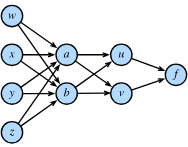

By composing these functions, we obtain a more complex function that ultimately depends on $(w, x, y, z)$.

Such chains of equations are common when working with neural networks, where ***each layer takes outputs from previous layers***. Understanding how to compute gradients through these compositions is essential, and it is ***the foundation of backpropagation and automatic differentiation.***

We can fully substitute $u,v,a$
and $𝑏$ into the function $f$ to obtain a very large composite expression.

$$
f(w,x,y,z)
= \Big( \big((w+x+y+z)^2 + (w+x-y-z)^2 \big)^2
  + \big((w+x+y+z)^2 - (w+x-y-z)^2 \big)^2 \Big)^2
$$

## **2.2. The Limitations of Direct Differentiation**
This expression is already extremely large, and when we try to differentiate it directly using basic derivative rules, the complexity grows even more. For instance, computing the partial derivative with respect to $w$ gives the huge expression:

$$\frac{\partial f}{\partial w}
=
2 \Big(
2\big( 2(w+x+y+z) - 2(w+x-y-z) \big)
\big( (w+x+y+z)^2 - (w+x-y-z)^2 \big)
+
2\big( 2(w+x-y-z) + 2(w+x+y+z) \big)
\big( (w+x-y-z)^2 + (w+x+y+z)^2 \big)
\Big)
\\
\qquad\qquad \times
\Big(
\big( (w+x+y+z)^2 - (w+x-y-z)^2 \big)^2
+
\big( (w+x-y-z)^2 + (w+x+y+z)^2 \big)^2
\Big)$$

This enormous derivative contains many repeated sub-expressions, such as:

- $(w + x + y + z)^2$
- $(w + x - y - z)^2$
- Their sums and differences
- Their squares and repeated occurrences across multiple terms

If we attempted to compute another derivative, for example $\frac{\partial f}{\partial x},$ we would end up with **another massive expression** that shares many of the same repeated components.


## **2.3. Chain Rule Over Multiple Paths in a Computational Graph**
Now we examine how the function $f(u(a,b),\, v(a,b))$ changes when we slightly change the variable $a$.  
To do this, we ignore $w, x, y,$ and $z$ for now and focus only on how $a$ affects $f$.

Suppose we add a small amount $\epsilon$ to $a$. Then:

$$
f(u(a+\epsilon, b),\; v(a+\epsilon, b))
$$

Using a first-order approximation, we get:

$$
\approx f\Big(u(a,b) + \epsilon\,\frac{\partial u}{\partial a}(a,b),\;
              v(a,b) + \epsilon\,\frac{\partial v}{\partial a}(a,b)\Big)
$$

Expanding this with the definition of the gradient:

$$
\approx f(u(a,b), v(a,b)) +
\epsilon \left[
\frac{\partial f}{\partial u}\frac{\partial u}{\partial a}
+
\frac{\partial f}{\partial v}\frac{\partial v}{\partial a}
\right]
$$

This leads to the multivariable chain rule:

$$
\frac{\partial f}{\partial a}
=
\frac{\partial f}{\partial u}\frac{\partial u}{\partial a}
+
\frac{\partial f}{\partial v}\frac{\partial v}{\partial a}
$$

This means that $a$ influences $f$ through two separate pathways:

- $a \rightarrow u \rightarrow f$
- $a \rightarrow v \rightarrow f$

The total change in $f$ is the sum of both effects.  
This is exactly what the chain rule represents and forms the foundation of backpropagation and automatic differentiation.


## **2.4. Example**

Consider the following computational graph:

- $u$ and $v$ depend on the inputs $x$ and $y$,
- $a$ and $b$ depend on $u$ and $v$,
- the final output $f$ depends on $a$, $u$, and $b$.

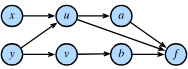

There are multiple paths through which a change in $y$ can influence $f$:

1. $y \rightarrow u \rightarrow a \rightarrow f$
2. $y \rightarrow u \rightarrow f$
3. $y \rightarrow v \rightarrow b \rightarrow f$

To compute the total derivative of $f$ with respect to $y$, we must sum the contribution from **all** these paths.  
This gives the multivariable chain rule in path–sum form:

$$
\frac{\partial f}{\partial y}
=
\frac{\partial f}{\partial a}\frac{\partial a}{\partial u}\frac{\partial u}{\partial y}
+
\frac{\partial f}{\partial u}\frac{\partial u}{\partial y}
+
\frac{\partial f}{\partial b}\frac{\partial b}{\partial v}\frac{\partial v}{\partial y}.
$$

Understanding gradients in terms of paths through the graph is exactly how backpropagation works:  
gradients flow backward along every edge, and the total gradient at a node is the sum of all incoming contributions.


# **3. Backward Function**

## **3.1. Backpropagation**

***Backpropagation*** is an algorithm used in neural networks to compute the gradients of the loss function with respect to the model’s weights, by propagating the error backward through the network. These gradients are then used to update the weights using optimization methods like gradient descent.

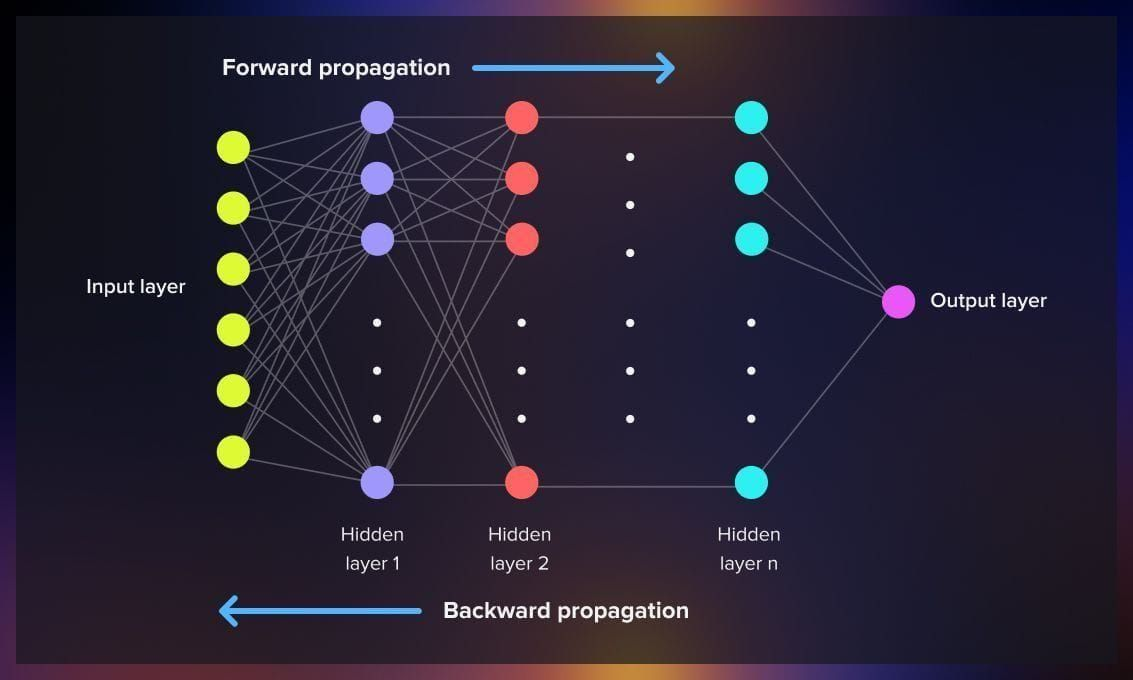



##**3.2. Example**
$$
f(u, v) = (u + v)^2
$$

$$
u(a,b) = (a + b)^2, \qquad v(a,b) = (a - b)^2
$$

$$
a(w,x,y,z) = (w + x + y + z)^2, \qquad
b(w,x,y,z) = (w + x - y - z)^2
$$

Applying Chain Rule

$$
\frac{\partial f}{\partial w}
=
\frac{\partial f}{\partial u}\frac{\partial u}{\partial w}
+
\frac{\partial f}{\partial v}\frac{\partial v}{\partial w}
$$

$$
\frac{\partial u}{\partial w}
=
\frac{\partial u}{\partial a}\frac{\partial a}{\partial w}
+
\frac{\partial u}{\partial b}\frac{\partial b}{\partial w}
$$

$$
\frac{\partial v}{\partial w}
=
\frac{\partial v}{\partial a}\frac{\partial a}{\partial w}
+
\frac{\partial v}{\partial b}\frac{\partial b}{\partial w}
$$

Single differentiations

$$
\frac{\partial f}{\partial u} = 2(u+v), \qquad
\frac{\partial f}{\partial v} = 2(u+v)
$$

$$
\frac{\partial u}{\partial a} = 2(a+b), \qquad
\frac{\partial u}{\partial b} = 2(a+b)
$$

$$
\frac{\partial v}{\partial a} = 2(a-b), \qquad
\frac{\partial v}{\partial b} = -2(a-b)
$$

$$
\frac{\partial a}{\partial w} = 2(w+x+y+z), \qquad
\frac{\partial b}{\partial w} = 2(w+x-y-z)
$$


In [4]:
import torch

# =======================
# 1. Giá trị đầu vào
# =======================
w, x, y, z = -1.0, 0.0, -2.0, 1.0

# =======================
# 2. Forward (manual)
# =======================
a = (w + x + y + z) ** 2
b = (w + x - y - z) ** 2
u = (a + b) ** 2
v = (a - b) ** 2
f = (u + v) ** 2

# =======================
# 3. Manual gradient
# =======================
df_du = 2 * (u + v)
df_dv = 2 * (u + v)

du_da = 2 * (a + b)
du_db = 2 * (a + b)
dv_da = 2 * (a - b)
dv_db = -2 * (a - b)

da_dw = 2 * (w + x + y + z)
db_dw = 2 * (w + x - y - z)

da_dx = da_dw
db_dx = db_dw

da_dy = 2 * (w + x + y + z)
db_dy = -2 * (w + x - y - z)

da_dz = da_dy
db_dz = db_dy

df_da = df_du * du_da + df_dv * dv_da
df_db = df_du * du_db + df_dv * dv_db

df_dw_m = df_da * da_dw + df_db * db_dw
df_dx_m = df_da * da_dx + df_db * db_dx
df_dy_m = df_da * da_dy + df_db * db_dy
df_dz_m = df_da * da_dz + df_db * db_dz

# =======================
# 4. PyTorch autograd
# =======================
wt = torch.tensor([w], requires_grad=True)
xt = torch.tensor([x], requires_grad=True)
yt = torch.tensor([y], requires_grad=True)
zt = torch.tensor([z], requires_grad=True)

at = (wt + xt + yt + zt) ** 2
bt = (wt + xt - yt - zt) ** 2
ut = (at + bt) ** 2
vt = (at - bt) ** 2
ft = (ut + vt) ** 2

ft.backward()

# =======================
# 5. Gộp bảng so sánh
# =======================
print("\n===== GRADIENT COMPARISON TABLE =====")
print(f"{'Var':<6} {'Value':<10} {'grad_manual':<15} {'grad_pytorch'}")
print("-" * 55)

print(f"{'w':<6} {w:<10} {df_dw_m:<15} {wt.grad.item()}")
print(f"{'x':<6} {x:<10} {df_dx_m:<15} {xt.grad.item()}")
print(f"{'y':<6} {y:<10} {df_dy_m:<15} {yt.grad.item()}")
print(f"{'z':<6} {z:<10} {df_dz_m:<15} {zt.grad.item()}")

print("-" * 55)
print(f"f value: {f}")



===== GRADIENT COMPARISON TABLE =====
Var    Value      grad_manual     grad_pytorch
-------------------------------------------------------
w      -1.0       -4096.0         -4096.0
x      0.0        -4096.0         -4096.0
y      -2.0       -4096.0         -4096.0
z      1.0        -4096.0         -4096.0
-------------------------------------------------------
f value: 1024.0


##**3.2. Backpropagation for non scalar variables**



**When `y` is a scalar,**
PyTorch can directly compute:

$$\frac{\partial y}{\partial x}$$

**When `y` is a vector,**
the correct derivative is a **Jacobian matrix**:

$$J = \frac{\partial y}{\partial x}$$

This produces a **matrix**, not a vector.

**Why PyTorch does not compute Jacobians automatically?**

Computing Jacobians is:
- Memory-intensive
- Slow

According to Pytorch document, if the tensor is non-scalar (i.e. its data has more than one element) and requires gradient, the function additionally requires specifying a gradient. It should be a tensor of matching type and shape, that represents the gradient of the differentiated function w.r.t. self.

In deep learning, we usually only need the **sum of gradients**, not the full Jacobian.

**Why `.backward()` fails for vector outputs?**
PyTorch cannot guess how to reduce a vector to a scalar, so you must provide a gradient manually.

Example:

```python
y.backward(gradient=torch.ones(len(y)))
#equavilent to
y.sum().backward()


In [5]:
import torch
import pandas as pd

# ========== Input ==========
x = torch.tensor([1., 2., 3.], requires_grad=True)

# ========== Vector function ==========
# y is vector-valued
y = x * x   # element-wise square

print("x:", x.detach().numpy())
print("y:", y.detach().numpy())

# ========== 1. Manual Jacobian ==========
# y = [x1^2, x2^2, x3^2]
# dy_i/dx_j = 2*x_i if i==j else 0
n = len(x)
jacobian_manual = [[0.0] * n for _ in range(n)]

for i in range(n):
    for j in range(n):
        if i == j:
            jacobian_manual[i][j] = 2 * x.detach().numpy()[i]

# ========== 2. Try backward() without gradient (will fail) ==========
try:
    x.grad = None
    y.backward()
except RuntimeError as e:
    error_msg = str(e)

# ========== 3. Use backward with vector ==========
x.grad = None
v = torch.ones_like(y)  # vector for VJP
y.backward(gradient=v)
vjp = x.grad.clone().detach().numpy()

# ========== Show results ==========
print("\n---- PyTorch Behavior ----")
print("\nVector-Jacobian Product (v = [1,1,1]):")
print("Result from backward():", vjp)

# ========== Show manual Jacobian ==========
df = pd.DataFrame(jacobian_manual, columns=[f'dy{i+1}/dx1' for i in range(n)])
df.index = [f'y{i+1}' for i in range(n)]

print("\n---- Manual Full Jacobian ----")
print(df)


x: [1. 2. 3.]
y: [1. 4. 9.]

---- PyTorch Behavior ----

Vector-Jacobian Product (v = [1,1,1]):
Result from backward(): [2. 4. 6.]

---- Manual Full Jacobian ----
    dy1/dx1  dy2/dx1  dy3/dx1
y1      2.0      0.0      0.0
y2      0.0      4.0      0.0
y3      0.0      0.0      6.0


#**4. Detaching Computation**

##**4.1. Detaching Computation in Automatic Differentiation**
In the context of automatic differentiation, there are specific scenarios where we wish to exclude certain calculations from the recorded computational graph. This technique is known as **detaching computation**.

 **- Motivation**
We may want to use a variable to create auxiliary intermediate terms without those terms affecting the gradient computation. By detaching a variable, we effectively treat it as a constant during backpropagation, "wiping out" its computational history (provenance).

**- Illustrative Example**
Consider a scenario where variable $z$ depends on $x$ in two ways: directly, and indirectly through $y$.
* $y = x \cdot x$
* $z = y \cdot x$

If we compute the gradient normally, $z = x^3$, so $\frac{dz}{dx} = 3x^2$. However, suppose we want to analyze the **direct influence** of $x$ on $z$, ignoring the influence conveyed via $y$.

**- The Mechanism**
To achieve this, we create a new variable $u$ using the `.detach()` method:
$$u = y.\text{detach()}$$

* **Value:** $u$ retains the same numerical value as $y$ (which is $x^2$).
* **Graph:** $u$ has no ancestors in the computational graph. The system views $u$ as a computed constant, not a function of $x$.

**- Resulting Gradient**
When we define $z = u \cdot x$ and compute the gradient:
* The system sees: $z = C \cdot x$ (where $C = u$).
* The gradient calculated is: $\frac{dz}{dx} = u$.
* Substituting the value, the result is $x^2$, **not** $3x^2$.

**- Code Verification (PyTorch)**
The following logic confirms that `x.grad` equals `u` (the detached value), proving that the path through $y$ was successfully ignored.


In [6]:
# Create a 1D tensor: x = [0.0, 1.0, 2.0, 3.0]
x = torch.arange(4.0)
x.requires_grad_(True)  # Enable gradient tracking

# Compute y = 2 * (x · x) = 2 * (x₀² + x₁² + x₂² + x₃²)
# For x = [0, 1, 2, 3]: y = 2 * (0 + 1 + 4 + 9) = 28
y = 2 * torch.dot(x, x)
print(f"y = 2 * dot(x, x) = {y}")
print(f"grad_fn of y: {y.grad_fn}")  # Shows: <MulBackward0>

# Compute gradient: dy/dx = 4x = [0, 4, 8, 12]
y.backward()
print(f"Gradient dy/dx = {x.grad}")  # [0., 4., 8., 12.]

# ============================================================
# EXAMPLE 2: Demonstrating detach() effect
# ============================================================
# Reset gradient to zero before next computation
x.grad.zero_()

# Compute y = x * x element-wise: y = [0, 1, 4, 9]
y = x * x
print(f"\ny = x * x = {y}")
print(f"grad_fn of y: {y.grad_fn}")  # Shows: <MulBackward0>

# Detach y from computational graph
# u has the same values as y but NO gradient history
u = y.detach()
print(f"u = y.detach() = {u}")
print(f"grad_fn of u: {u.grad_fn}")  # Shows: None (no computational history!)

# Compute z = u * x, where u is treated as a CONSTANT
# z = [0*0, 1*1, 4*2, 9*3] = [0, 1, 8, 27]
z = u * x
print(f"\nz = u * x = {z}")
print(f"grad_fn of z: {z.grad_fn}")  # Shows: <MulBackward0>

# Compute gradient of sum of z
# Since u is detached (constant), dz/dx = u = [0, 1, 4, 9]
z.sum().backward()
print(f"\nGradient dz/dx = {x.grad}")  # [0., 1., 4., 9.]
print(f"u (for comparison) = {u}")     # [0., 1., 4., 9.]
print(f"x.grad == u: {x.grad == u}")   # tensor([True, True, True, True])

y = 2 * dot(x, x) = 28.0
grad_fn of y: <MulBackward0 object at 0x782cdabc8fa0>
Gradient dy/dx = tensor([ 0.,  4.,  8., 12.])

y = x * x = tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
grad_fn of y: <MulBackward0 object at 0x782cdabc8fa0>
u = y.detach() = tensor([0., 1., 4., 9.])
grad_fn of u: None

z = u * x = tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>)
grad_fn of z: <MulBackward0 object at 0x782cdabc8fa0>

Gradient dz/dx = tensor([0., 1., 4., 9.])
u (for comparison) = tensor([0., 1., 4., 9.])
x.grad == u: tensor([True, True, True, True])


##**4.2. Understanding `detach()` in PyTorch: Metadata vs Storage**


In PyTorch, a tensor is composed of two main components:

****- Tensor Metadata****: Shape, stride, data type, device location, and gradient tracking information (requires_grad, grad_fn).

****- Tensor Storage****: The actual data buffer in memory (RAM or GPU VRAM)
When you call detach(), PyTorch creates a new tensor object with its own metadata, but this new tensor references the same underlying storage as the original tensor. This is a **view** operation, not a copy operation.

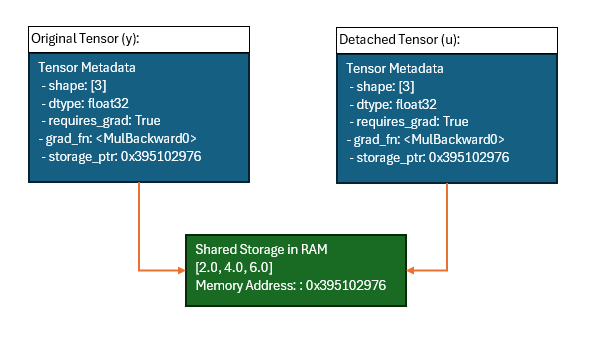

**Advantages:**
- **Memory Efficiency**: No data duplication, saving RAM/VRAM
- **Performance**: No memcpy overhead, instantaneous operation
- **Use Case**: When you only need to break gradient flow without creating data copies

**Disadvantages:**
- **Side Effects**: Modifying one tensor affects the other
- **Unexpected Behavior**: Can lead to bugs if not understood properly
- **Thread Safety**: Shared memory can cause race conditions in multi-threaded contexts

 **Best Practices**

**Use `detach()` alone** when:
   - You need gradient isolation but don't mind shared memory
   - You're only reading the values (not modifying)
   - Memory efficiency is critical

**Use `detach().clone()` when**:
   - You need complete independence between tensors
   - You plan to modify the detached tensor
   - Thread safety is a concern

3. **Document your intent** in code comments when using `detach()` to avoid confusion for other developers

In [7]:
print("\n" + "="*60)
print("EXAMPLE 3: Memory Sharing Demonstration")
print("="*60)

# Create new tensor for this example
a = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
b = a * 2  # b = [2.0, 4.0, 6.0]
c = b.detach()  # c shares memory with b, but no gradient tracking

print(f"b (original) = {b}")
print(f"c (detached) = {c}")
print(f"b.data_ptr() = {b.data_ptr()}")  # Memory address of b
print(f"c.data_ptr() = {c.data_ptr()}")  # Memory address of c
print(f"Same memory? {b.data_ptr() == c.data_ptr()}")  # True!

# Modify c in-place (using index assignment)
# Since c and b share the same memory, b will also change!
print("\nModifying c[0] = 999.0 (in-place modification)...")
c[0] = 999.0

print(f"After modification:")
print(f"b = {b}")  # b[0] also changed to 999.0!
print(f"c = {c}")  # c[0] is 999.0
print("⚠️  Note: Both b and c changed because they share the same RAM!")

# If we reassign c (not in-place), b won't change
print("\nReassigning c = torch.tensor([111.0, 222.0, 333.0])...")
c = torch.tensor([111.0, 222.0, 333.0])

print(f"After reassignment:")
print(f"b = {b}")  # b stays [999.0, 4.0, 6.0]
print(f"c = {c}")  # c is now [111.0, 222.0, 333.0]
print("✓ b didn't change because c now points to a different tensor")

# To avoid memory sharing, use .clone()
print("\n" + "="*60)
print("SOLUTION: Use .detach().clone() to avoid memory sharing")
print("="*60)
d = b.detach().clone()  # Creates a separate copy in memory
print(f"d = b.detach().clone() = {d}")
print(f"b.data_ptr() = {b.data_ptr()}")
print(f"d.data_ptr() = {d.data_ptr()}")
print(f"Same memory? {b.data_ptr() == d.data_ptr()}")  # False!

d[0] = 777.0
print(f"\nAfter d[0] = 777.0:")
print(f"b = {b}")  # b unchanged: [999.0, 4.0, 6.0]
print(f"d = {d}")  # d changed: [777.0, 4.0, 6.0]
print("✓ b didn't change because d is a separate copy in memory")


EXAMPLE 3: Memory Sharing Demonstration
b (original) = tensor([2., 4., 6.], grad_fn=<MulBackward0>)
c (detached) = tensor([2., 4., 6.])
b.data_ptr() = 229689472
c.data_ptr() = 229689472
Same memory? True

Modifying c[0] = 999.0 (in-place modification)...
After modification:
b = tensor([999.,   4.,   6.], grad_fn=<MulBackward0>)
c = tensor([999.,   4.,   6.])
⚠️  Note: Both b and c changed because they share the same RAM!

Reassigning c = torch.tensor([111.0, 222.0, 333.0])...
After reassignment:
b = tensor([999.,   4.,   6.], grad_fn=<MulBackward0>)
c = tensor([111., 222., 333.])
✓ b didn't change because c now points to a different tensor

SOLUTION: Use .detach().clone() to avoid memory sharing
d = b.detach().clone() = tensor([999.,   4.,   6.])
b.data_ptr() = 229689472
d.data_ptr() = 227739136
Same memory? False

After d[0] = 777.0:
b = tensor([999.,   4.,   6.], grad_fn=<MulBackward0>)
d = tensor([777.,   4.,   6.])
✓ b didn't change because d is a separate copy in memory


#**5. Gradients and Python Control Flow**

## **5.1. Function and Code**
The function $f(a)$ is defined as follows:

In [8]:
import torch

def f(a):
    """
    A function demonstrating dynamic control flow (while loop and if statement).
    """
    b = a * 2
    while b.norm() < 1000:
        b = b * 2

    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

# We verify the derivative:
a = torch.randn(size=(), requires_grad=True) # a is a random scalar/tensor
d = f(a)
d.backward()

# Check: Is a.grad equal to d / a?
print(f"Value of a: {a.item()}")
print(f"Value of f(a): {d.item()}")
print(f"Gradient caculated by python: {a.grad.item():10f}")
print(f"Gradient caculated by manual (f(a)/a): {d.item() / a.item():10f}")
print(f"a.grad == d/a: {a.grad == d / a}")

Value of a: -0.7185292840003967
Value of f(a): -147154.796875
Gradient caculated by python: 204800.000000
Gradient caculated by manual (f(a)/a): 204799.999320
a.grad == d/a: True


## **5.2. Detailed Mathematical Proof**

At first glance, the function $f(a)$ appears complex and non-linear due to the control flow (while loops and if statements). However, let us closely analyze its algebraic structure.

#### **Step 1:** Analyzing the while loop
* Initialization: $b_0 = 2a$.
* Loop Logic: In each iteration, $b$ is simply multiplied by 2.

After $n$ iterations, the value of $b$ will be:$$b_n = 2^n \cdot (2a) = 2^{n+1} \cdot a$$Where $n$ is a positive integer that depends on the value of $a$ (to satisfy the condition norm < 1000). However, for a specifically fixed $a$ during a single forward pass, $n$ is a constant.

#### **Step 2:** Analyzing the if statement

Finally, $c$ will equal either $b$ or $100b$.

In summary:$$c = k \cdot a$$Where $k$ is an aggregate constant (it can be either $2^{n+1}$ or $100 \cdot 2^{n+1}$).

#### **Step 3:** Calculating the DerivativeThe function is essentially a Linear Function with respect to the variable $a$:$$f(a) = k \cdot a$$

The derivative of $f(a)$ with respect to $a$ is:$$\frac{df}{da} = k$$

On the other hand, from the function equation, we can extract $k$:$$k = \frac{f(a)}{a}$$

Therefore:$$\frac{df}{da} = \frac{f(a)}{a}$$

This proves why $a.grad == d / a$ always returns True (within the limits of floating-point machine precision).

## **5.3. How PyTorch's Autograd engine handles this specific scenario internally**

*PyTorch Builds the Graph: "Define-by-Run*

Unlike static graph frameworks (like old TensorFlow 1.x) that define a loop structure before running data, PyTorch uses a Dynamic Computation Graph (also known as Define-by-Run).

This means PyTorch does not record "there is a while loop here." Instead, it records exactly what happened to the data as it happened. It records the history of operations (the "tape").

1. The Concept of "Unrolling" the LoopWhen you run f(a), PyTorch watches the tensor a.
* Iteration 0: You do b = a * 2. PyTorch creates a multiplication node.
* The While Loop: PyTorch does not create a "While Loop" node in the graph. Instead, it waits to see what executes.
  * If the loop runs 5 times, PyTorch records 5 separate multiplication nodes in a sequence.
  * If the loop runs 100 times, it records 100 separate multiplication nodes.
  
  This is called Unrolling. To the Autograd engine, the loop looks like a long, straight chain of operations:$$a \xrightarrow{\times 2} b_0 \xrightarrow{\times 2} b_1 \xrightarrow{\times 2} b_2 \dots \xrightarrow{\times 2} b_n \dots \xrightarrow{} c$$


2. The Backward Pass

   When you call d.backward(), PyTorch traverses this specific chain in reverse.

    It effectively calculates the gradient using the Chain Rule for this specific sequence of multiplications:

    $$\frac{\partial c}{\partial a} = \frac{\partial c}{\partial b_n} \cdot \frac{\partial b_n}{\partial b_{n-1}} \dots \cdot \frac{\partial b_0}{\partial a}$$

    Since every operation was just "multiply by 2" (and one "multiply by 100" or "1"), the chain rule results in the product of these constants, which matches our mathematical proof $k$.




#**6. Exercises**

In [ ]:
#Library installation
!pip install torchviz graphviz

## ***6.1.*** *Why is the second derivative much more expensive to compute than the first derivative?*


### ***6.1.1.*** *Conceptual Explanation*
To understand the cost difference, we must look at how Automatic Differentiation constructs **Computational Graphs**.

1.  **First-Order Derivative (Gradient):** To compute $y'$, the system traverses the computational graph $G_1$ of the function $f(x)$. Once the backward pass is complete, $G_1$ is typically freed to save memory.

2.  **Second-Order Derivative (Hessian):** To compute $y'' = \frac{d}{dx}(f'(x))$, the system treats the gradient $f'(x)$ as a new objective function. It must build a **new graph $G_2$** to calculate the derivative of $G_1$.
    * This requires **retaining** $G_1$ in memory (via `create_graph=True`).
    * $G_2$ is significantly larger than $G_1$ because it contains all nodes of $G_1$ plus the new operations required for differentiation.


### ***6.1.2.*** *Mathematical Proof & Complexity Analysis*
The primary reason for the high cost in Deep Learning is **Dimensionality Explosion** (from Vector to Matrix).

Consider a function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ where $n$ is the number of parameters (e.g., $n=10^6$ in a neural network).

1. **First-order Derivative (Gradient):**
    * Mathematically: $\nabla f \in \mathbb{R}^n$.
    * **Space Complexity:** $O(n)$ (Linear).
    * **Time Complexity:** Requires 1 backward pass.

2. **Second-order Derivative (Hessian Matrix):**
    * Mathematically: According to **Appendix 22.4.27**, this is a matrix $\mathbf{H} \in \mathbb{R}^{n \times n}$ where $H_{ij} = \frac{\partial^2 f}{\partial x_i \partial x_j}$.

  The complete expansion of the matrix $H_{ij}$ (size $n \times n$):

  $$H_{ij} = \begin{pmatrix}
  \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
  \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
  \vdots & \vdots & \ddots & \vdots \\
  \frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
  \end{pmatrix}
  $$

  
  
  **Space Complexity:** $O(n^2)$ (Quadratic). Storing $10^{12}$ floats for a 1M parameter model is infeasible.
  
  **Time Complexity:** Computing the full Hessian requires calculating the derivative of **each element** of the gradient vector with respect to the input. This effectively requires **$n$ backward passes**.



### ***6.1.3.*** *Code Illustration*
The following code demonstrates both the graph retention requirement and the computational loop required to build a Hessian matrix.

In [ ]:
import torch

# Define a vector input x of size n=3
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Function: y = x1^3 + x2^3 + x3^3 (Sum of cubes)
y = (x**3).sum()

# --- Step 1: Compute First Derivative (Gradient) ---
# Time Complexity: O(1) pass
# Space Complexity: O(n) - Result is a vector
# create_graph=True is REQUIRED to retain the graph for the next calculation
grads = torch.autograd.grad(y, x, create_graph=True)[0]

print(f"1. Gradient (Vector shape: {grads.shape}):\n{grads}")
# Result: [3, 12, 27] (Since y' = 3x^2)

# --- Step 2: Compute Second Derivative (Hessian Matrix) ---
# To get the full Hessian matrix, we must differentiate EACH element
# of the gradient vector with respect to the input vector x.

hessian = []
print("\nCalculating Hessian rows...")

# Loop n times (Time Complexity increases linearly with n)
for i, g_elem in enumerate(grads):
    # This creates a new graph for every element
    grad_2nd = torch.autograd.grad(g_elem, x, retain_graph=True)[0]
    hessian.append(grad_2nd)
    print(f" - Row {i} calculated.")

# Stack rows to form the Matrix
H = torch.stack(hessian)

print(f"\n2. Hessian (Matrix shape: {H.shape}):\n{H}")
# Space Complexity: O(n^2) - Result is a Matrix

1. Gradient (Vector shape: torch.Size([3])):
tensor([ 3., 12., 27.], grad_fn=<MulBackward0>)

Calculating Hessian rows...
 - Row 0 calculated.
 - Row 1 calculated.
 - Row 2 calculated.

2. Hessian (Matrix shape: torch.Size([3, 3])):
tensor([[ 6.,  0.,  0.],
        [ 0., 12.,  0.],
        [ 0.,  0., 18.]])


### ***6.1.4.*** *Manual Calculation Verification*

To verify the correctness of our Python code, we perform the calculation by hand for the specific function and input values used.

**Problem Statement:**
Given the input vector $\mathbf{x} = [x_1, x_2, x_3]^\top$ with values $\mathbf{x} = [1, 2, 3]^\top$.
The objective function is:
$$y = f(\mathbf{x}) = x_1^3 + x_2^3 + x_3^3$$

**Goals:**
1.  Calculate the Gradient vector $\nabla f(\mathbf{x})$.
2.  Calculate the Hessian Matrix $\mathbf{H}(\mathbf{x})$.

---

#### ***Step 1:*** Calculating the Gradient (First Derivative)

The gradient is a vector containing the partial derivatives with respect to each variable $x_i$.

**Formula:**
$$\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial y}{\partial x_1} \\ \frac{\partial y}{\partial x_2} \\ \frac{\partial y}{\partial x_3} \end{bmatrix}$$

**Differentiation:**
* Partial derivative w.r.t $x_1$: $\frac{\partial}{\partial x_1}(x_1^3 + x_2^3 + x_3^3) = 3x_1^2$ (Treating $x_2, x_3$ as constants).
* Partial derivative w.r.t $x_2$: $\frac{\partial}{\partial x_2}(\dots) = 3x_2^2$.
* Partial derivative w.r.t $x_3$: $\frac{\partial}{\partial x_3}(\dots) = 3x_3^2$.

**Evaluation at $\mathbf{x} = [1, 2, 3]$:**
* $g_1 = 3 \cdot (1)^2 = 3$
* $g_2 = 3 \cdot (2)^2 = 3 \cdot 4 = 12$
* $g_3 = 3 \cdot (3)^2 = 3 \cdot 9 = 27$

$\Rightarrow$ **Gradient Result:** $\mathbf{g} = [3, 12, 27]^\top$.
*(This matches the code output: `tensor([ 3., 12., 27.])`)*

---

#### ***Step 2:*** Calculating the Hessian (Second Derivative)

The Hessian is the matrix of second-order partial derivatives. It represents the derivative of the gradient vector $\mathbf{g}$ with respect to the input vector $\mathbf{x}$.

**Matrix Structure:**
$$ \mathbf{H} = \begin{bmatrix}
\frac{\partial g_1}{\partial x_1} & \frac{\partial g_1}{\partial x_2} & \frac{\partial g_1}{\partial x_3} \\
\frac{\partial g_2}{\partial x_1} & \frac{\partial g_2}{\partial x_2} & \frac{\partial g_2}{\partial x_3} \\
\frac{\partial g_3}{\partial x_1} & \frac{\partial g_3}{\partial x_2} & \frac{\partial g_3}{\partial x_3}
\end{bmatrix} $$

**Row-by-Row Calculation (Corresponding to the `for` loop in the code):**

* **Row 1 (Derivative of $g_1 = 3x_1^2$):**
    * $\frac{\partial}{\partial x_1}(3x_1^2) = 6x_1$
    * $\frac{\partial}{\partial x_2}(3x_1^2) = 0$ (Independent of $x_2$)
    * $\frac{\partial}{\partial x_3}(3x_1^2) = 0$ (Independent of $x_3$)
    * $\rightarrow$ Resulting Row: $[6x_1, 0, 0]$

* **Row 2 (Derivative of $g_2 = 3x_2^2$):**
    * $\frac{\partial}{\partial x_1}(3x_2^2) = 0$
    * $\frac{\partial}{\partial x_2}(3x_2^2) = 6x_2$
    * $\frac{\partial}{\partial x_3}(3x_2^2) = 0$
    * $\rightarrow$ Resulting Row: $[0, 6x_2, 0]$

* **Row 3 (Derivative of $g_3 = 3x_3^2$):**
    * $\frac{\partial}{\partial x_1}(3x_3^2) = 0$
    * $\frac{\partial}{\partial x_2}(3x_3^2) = 0$
    * $\frac{\partial}{\partial x_3}(3x_3^2) = 6x_3$
    * $\rightarrow$ Resulting Row: $[0, 0, 6x_3]$

**Evaluation at $\mathbf{x} = [1, 2, 3]$:**

* $H_{11} = 6 \cdot 1 = 6$
* $H_{22} = 6 \cdot 2 = 12$
* $H_{33} = 6 \cdot 3 = 18$
* All off-diagonal elements are $0$.

$\Rightarrow$ **Hessian Result:**
$$\mathbf{H} = \begin{bmatrix} 6 & 0 & 0 \\ 0 & 12 & 0 \\ 0 & 0 & 18 \end{bmatrix}$$

*(This matches the code output exactly)*

## ***6.2.*** *After running the function for backpropagation, immediately run it again and see what happens. Investigate.*

### ***6.2.1.*** *Conceptual Explanation*
There are two possible outcomes depending on how `backward()` is called, revealing two core design principles of PyTorch:

1.  **Graph Destruction (Default Behavior):** By default, PyTorch frees the computational graph buffers immediately after `backward()` executes to save memory. Running it a second time will cause a **RuntimeError** because the intermediate values required for differentiation no longer exist.

2.  **Gradient Accumulation (With `retain_graph=True`):** If we explicitly force PyTorch to keep the graph, running `backward()` a second time will not overwrite the previous gradient. Instead, it **accumulates (adds)** the new gradient to the existing one.
    * *Why?* This is designed for mini-batch training, where the total gradient is the sum of gradients from individual samples: $\nabla \mathcal{L}_{total} = \sum \nabla \mathcal{L}_i$.




### ***6.2.2.*** *Mathematical Proof & Logic*
To explain the behavior of running `backward()` twice, we refer to the properties of the **Gradient Operator** $\nabla_{\mathbf{x}}$ defined in Appendix 22.

#### **- Definitions**
Let $\mathbf{x} \in \mathbb{R}^n$ be the input vector.
Let $y = f(\mathbf{x}) \in \mathbb{R}$ be the scalar objective function (e.g., loss function).
According to **Appendix 22.1**, the gradient of $y$ with respect to $\mathbf{x}$ is a vector:
$$\nabla_{\mathbf{x}} y = \left[ \frac{\partial y}{\partial x_1}, \frac{\partial y}{\partial x_2}, \dots, \frac{\partial y}{\partial x_n} \right]^\top$$

#### **- The Accumulation Mechanism**
In Deep Learning optimization (SGD), the total objective function over a dataset is often the sum of individual loss functions $l_i(\mathbf{x})$:
$$L(\mathbf{x}) = \sum_{i=1}^m l_i(\mathbf{x})$$

Due to the **Linearity of Differentiation** (a fundamental property of calculus mentioned in Appendix 22):
$$\nabla_{\mathbf{x}} \left( \sum l_i(\mathbf{x}) \right) = \sum \nabla_{\mathbf{x}} l_i(\mathbf{x})$$

#### **- Analysis of the Exercise**
When we execute `backward()` explicitly, PyTorch updates the `.grad` attribute using an additive rule to support the linearity principle above.

#### **- Analysis of the Exercise**
When we execute `backward()` explicitly, PyTorch updates the `.grad` attribute using an additive rule:

* **State $t_0$ (Initialization):**
    $\mathbf{g}_0 = \mathbf{0}$

* **State $t_1$ (First `backward` call):**
  The system computes the gradient
  $\mathbf{v} = \nabla_{\mathbf{x}} f(\mathbf{x})$
  The update rule is: $\mathbf{g}_1 = \mathbf{g}_0 + \mathbf{v} = \nabla_{\mathbf{x}} f(\mathbf{x})$

* **State $t_2$ (Second `backward` call without zeroing):**
  The system re-computes $\mathbf{v} = \nabla_{\mathbf{x}} f(\mathbf{x})$.
  The update rule applies again:
  $\mathbf{g}_2 = \mathbf{g}_1 + \mathbf{v} = 2 \cdot \nabla_{\mathbf{x}} f(\mathbf{x})$

 $\mathbf{g}_1 = \mathbf{g}_0 + \mathbf{v} = \nabla_{\mathbf{x}} f(\mathbf{x})$


**Conclusion:** The mathematical result of running backpropagation twice is equivalent to computing the gradient of the function $2f(\mathbf{x})$.



### ***6.2.3.*** *Code Illustration*
This code demonstrates the "Accumulation" behavior (assuming we handle the "Graph Destruction" by using `retain_graph=True`).

In [ ]:
import torch

# Define scalar input x = 4.0
x = torch.tensor([4.0], requires_grad=True)

# Function: y = x^2
# Derivative: y' = 2x
y = x * x

print(f"Input x: {x.item()}")
print(f"Theoretical derivative f'(x) = 2x = 8.0")

# --- Run 1: First Backpropagation ---
# We MUST use retain_graph=True, otherwise Run 2 will crash with RuntimeError
y.backward(retain_graph=True)

print(f"\n[Run 1] x.grad: {x.grad.item()}")
# Expected: 8.0

# --- Run 2: Immediate Second Backpropagation ---
# We do NOT zero the gradient (no x.grad.zero_())
y.backward()

print(f"[Run 2] x.grad: {x.grad.item()}")
# Expected: 16.0 (8.0 + 8.0)

# --- Correction ---
# This is why we use optimizer.zero_grad() in training loops
x.grad.zero_()
print(f"[Reset] x.grad: {x.grad.item()}")

Input x: 4.0
Theoretical derivative f'(x) = 2x = 8.0

[Run 1] x.grad: 8.0
[Run 2] x.grad: 16.0
[Reset] x.grad: 0.0


In [ ]:
import torch

# Define scalar input x = 4.0
x = torch.tensor([4.0], requires_grad=True)

# Function: y = x^2
# Derivative: y' = 2x
y = x * x

print(f"Input x: {x.item()}")
print(f"Theoretical derivative f'(x) = 2x = 8.0")

# --- Run 1: First Backpropagation ---
# We MUST use retain_graph=True, otherwise Run 2 will crash with RuntimeError
y.backward(retain_graph=True)

print(f"\n[Run 1] x.grad: {x.grad.item()}")
# Expected: 8.0

# --- Correction ---
# This is why we use optimizer.zero_grad() in training loops
x.grad.zero_()
print(f"[Reset] x.grad: {x.grad.item()}")

# --- Run 2: Immediate Second Backpropagation ---
# We do NOT zero the gradient (no x.grad.zero_())
y.backward()

print(f"[Run 2] x.grad: {x.grad.item()}")
# Expected: 8.0



Input x: 4.0
Theoretical derivative f'(x) = 2x = 8.0

[Run 1] x.grad: 8.0
[Reset] x.grad: 0.0
[Run 2] x.grad: 8.0


### ***6.2.4.*** *Manual Calculation Verification (Using Appendix 22 Rules)*

To verify the code output, we apply the formal **differentiation rules** defined in Appendix 22 (Calculus).

**Problem Statement:**
* Function: $f(x) = x^2$
* Input value: $x = 4$
* Action: Execute `backward()` twice without zeroing gradients.

#### **Step 1:** Compute the Gradient (First Pass)
According to the **Power Rule** (differentiation of polynomial functions in Appendix 22):
$$\frac{d}{dx}(x^n) = n x^{n-1}$$

Applying this to our function $f(x) = x^2$ (where $n=2$):
$$f'(x) = 2 x^{2-1} = 2x$$

Evaluate at $x = 4$:
$$f'(4) = 2 \cdot 4 = 8$$

* **Current State of Gradient Buffer:** $\mathbf{g} = 8$.

#### **Step 2:** Compute the Accumulated Gradient (Second Pass)
In Automatic Differentiation, calling `backward()` multiple times is mathematically equivalent to calculating the gradient of a sum of functions.

We apply the **Linearity Rule** of differentiation:
$$\frac{d}{dx} [c_1 f(x) + c_2 g(x)] = c_1 \frac{d}{dx}f(x) + c_2 \frac{d}{dx}g(x)$$

Here, running `backward()` twice implies we are calculating the derivative of $L = f(x) + f(x)$.
$$\nabla L = \frac{d}{dx}(f(x) + f(x)) = \frac{d}{dx}f(x) + \frac{d}{dx}f(x)$$

Substituting the values from Step 1:
$$\nabla L = 8 + 8 = 16$$

**Final State of Gradient Buffer:** $\mathbf{g} = 16$.

**Conclusion:** The code output `16.0` is correct and consistent with the Linearity Rule of calculus.

## ***6.3.*** *In the control flow example where we calculate the derivative of $d$ with respect to $a$, what would happen if we changed the variable $a$ to a random vector or a matrix? At this point, the result of the calculation $f(a)$ is no longer a scalar. What happens to the result? How do we analyze this?*

### ***6.3.1.*** *Conceptual Explanation*
In PyTorch, the `backward()` function is designed by default for **scalar outputs** (e.g., a single Loss value).
1.  **Scalar Output:** If output $y$ is a scalar, `y.backward()` computes the gradient vector $\nabla_{\mathbf{x}} y$ implicitly.
2.  **Vector Output:** If output $\mathbf{y}$ is a vector, the derivative is no longer a simple vector but a **Jacobian Matrix**. PyTorch does not compute the full Jacobian matrix (due to memory costs). Instead, it computes the **Jacobian-Vector Product (JVP)**.
    * You must provide a "gradient vector" $\mathbf{v}$ (same shape as $\mathbf{y}$) to the `backward(gradient=v)` function. This vector acts as a weight for combining the partial derivatives.





### ***6.3.2.*** *Mathematical Formalization (Based on Appendix 22)*
Let $\mathbf{x} \in \mathbb{R}^n$ be the input vector.
Let $\mathbf{y} = f(\mathbf{x}) \in \mathbb{R}^m$ be the output vector.

**The Jacobian Matrix:**
According to **Appendix 22.2**, the derivative of $\mathbf{y}$ w.r.t $\mathbf{x}$ is the Jacobian $\mathbf{J} \in \mathbb{R}^{m \times n}$:
$$J_{ij} = \frac{\partial y_i}{\partial x_j}$$

**The Backward Operation (JVP):**
When we call `y.backward(gradient=v)`, where $\mathbf{v} \in \mathbb{R}^m$, PyTorch computes:
$$\mathbf{g} = \mathbf{v}^\top \mathbf{J}$$
where $\mathbf{g} \in \mathbb{R}^n$ is the accumulated gradient stored in `x.grad`.

* *Common Case:* If we set $\mathbf{v} = [1, 1, \dots, 1]^\top$, we are essentially summing the rows of the Jacobian:
  $$g_j = \sum_{i=1}^m \frac{\partial y_i}{\partial x_j} = \frac{\partial}{\partial x_j} \left( \sum y_i \right)$$



### ***6.3.3.*** *Code Illustration*

In [ ]:
import torch

# 1. Define vector input (Size n=2)
a = torch.tensor([1.0, 2.0], requires_grad=True)

# 2. Define function with Control Flow
# Despite the loop, this function essentially scales 'a' by a constant factor k.
# f(a) = k * a
def f(a):
    b = a * 2
    # Loop condition depends on vector norm
    while b.norm() < 1000:
        print(f"\nb norm : {b.norm()}")
        b = b * 2
    return b

d = f(a)
print(f"\n Output d: {d}")

# 3. Attempt Backward
try:
    d.backward()
except RuntimeError as e:
    print(f"\n[Expected Error]: {e}")
    print("Reason: implicitly created only for scalar outputs.")

# 4. Correct Backward using Jacobian-Vector Product
# We pass a vector v of ones
v = torch.ones_like(d)
d.backward(gradient=v)
print(f"\nvecto v : {v}")
print(f"\nGradient a.grad: {a}")
print(f"\nGradient a.grad: {a.grad}")


b norm : 4.4721360206604

b norm : 8.9442720413208

b norm : 17.8885440826416

b norm : 35.7770881652832

b norm : 71.5541763305664

b norm : 143.1083526611328

b norm : 286.2167053222656

b norm : 572.4334106445312

 Output d: tensor([ 512., 1024.], grad_fn=<MulBackward0>)

[Expected Error]: grad can be implicitly created only for scalar outputs
Reason: implicitly created only for scalar outputs.

vecto v : tensor([1., 1.])

Gradient a.grad: tensor([1., 2.], requires_grad=True)

Gradient a.grad: tensor([512., 512.])


### ***6.3.4.*** *Manual Calculation Verification*

To verify the logic, we trace the control flow and apply the Jacobian formula.

####**Step 1:** Trace the Execution (Find $k$)
* **Input:** $\mathbf{a} = [1, 2]$.
* **Initial Norm:** $\|\mathbf{a}\| = \sqrt{1^2 + 2^2} = \sqrt{5} \approx 2.23$.
* **Loop Execution:**
    * Loop 1: $b = 2a \rightarrow$ Norm $\approx 4.47$.
    * Loop 2: $b = 4a \rightarrow$ Norm $\approx 8.94$.
    * ...
    * **Target:** Norm $\<= 1000$. Since $2.23 \times 2^8 \approx 572.4 < 1000. \rightarrow$ $b = 2^9 a$
* **Effective Scalar Factor:** The code effectively multiplies $\mathbf{a}$ by a total scalar factor $k$. Based on the output $d = [512., 1024.]$, we deduce $k = 512$.
* **Linear Function:** $\mathbf{d} = 512 \cdot \mathbf{a}$.

####**Step 2:** Compute Jacobian Matrix

The function can be written as a system of linear equations:
$$\begin{cases} y_1 = 512 x_1 \\ y_2 = 512 x_2 \end{cases}$$

The Jacobian Matrix $\mathbf{J}$ is:
$$\mathbf{J} = \begin{bmatrix} \frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} \\ \frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} \end{bmatrix} = \begin{bmatrix} 512 & 0 \\ 0 & 512 \end{bmatrix}$$

####**Step 3:** Compute Jacobian-Vector Product (JVP)
We passed `gradient=v=[1, 1]` to the backward function.
The accumulated gradient $\mathbf{g}$ is calculated as:

$$\mathbf{g} = \mathbf{v}^\top \mathbf{J} = \begin{bmatrix} 1 & 1 \end{bmatrix} \begin{bmatrix} 512 & 0 \\ 0 & 512 \end{bmatrix} = \begin{bmatrix} 512 & 512 \end{bmatrix}$$

**Match:** The manual result $[512, 512]$ matches `a.grad`. This confirms that despite complex control flow, PyTorch correctly traces the linear relationship.

## ***6.4.*** *Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its $f'$ derivative. Do not exploit the fact that $f'(x) =\cos(x)$ but rather use automatic differentiation to get the result.*

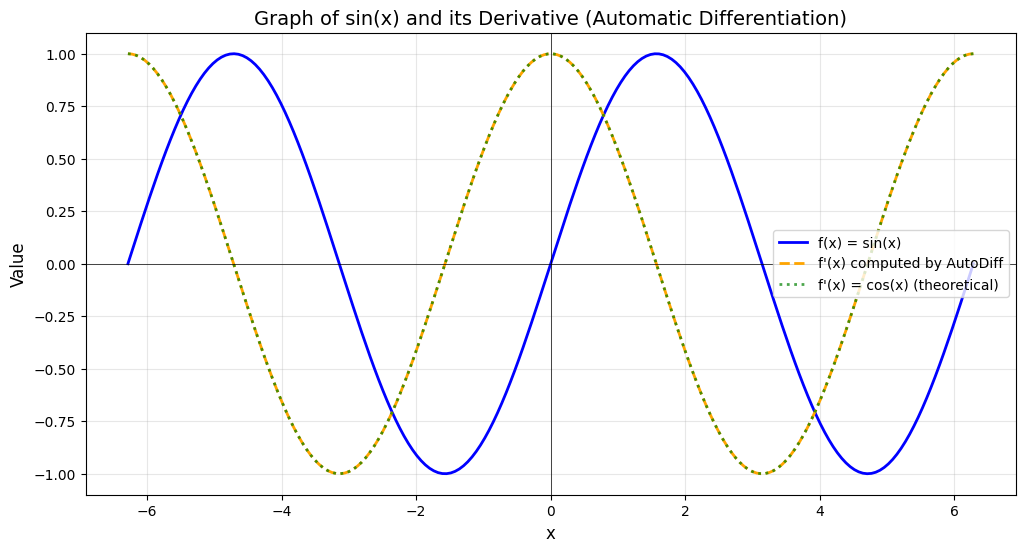

Computation graph:


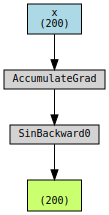

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchviz import make_dot

# ============================================================================
# AUTOMATIC DIFFERENTIATION DEMO: Computing derivative of sin(x)
# ============================================================================

# 1. Create input data x in the range from -2π to 2π
x_np = np.linspace(-2*np.pi, 2*np.pi, 200)

# Convert numpy array to PyTorch tensor
x = torch.tensor(x_np, dtype=torch.float32, requires_grad=True)

# 2. Define the function f(x) = sin(x)
y = torch.sin(x)

# 3. Compute derivatives using Automatic Differentiation (AutoDiff)
# Define y
y.backward(torch.ones_like(x))

# 4. Extract data for plotting
# y.detach() removes the tensor from the computation graph (sets grad_fn = None)
y_vals = y.detach().numpy()

# x.grad contains the computed derivative f'(x) = cos(x)
grad_vals = x.grad.numpy()

# Calculate theoretical derivative (cos(x)) for comparison
expected_grad = np.cos(x_np)

# 5. Visualize the results
plt.figure(figsize=(12, 6))

# Plot original function sin(x)
plt.plot(x_np, y_vals, label='f(x) = sin(x)', color='blue', linewidth=2)

# Plot derivative computed by AutoDiff
plt.plot(x_np, grad_vals, label="f'(x) computed by AutoDiff",
         color='orange', linestyle='--', linewidth=2)

# Plot theoretical derivative cos(x) for verification
plt.plot(x_np, expected_grad, label="f'(x) = cos(x) (theoretical)",
         color='green', linestyle=':', linewidth=2, alpha=0.7)

# Customize the plot
plt.title("Graph of sin(x) and its Derivative (Automatic Differentiation)", fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5)  # x-axis
plt.axvline(0, color='black', linewidth=0.5)  # y-axis
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# 6. Visualize the computation graph
print('=' * 50)
print('Computation graph:')
print('=' * 50)
# Create a visual representation of the computation graph
make_dot(y, params={"x": x})

##***6.5.*** *Let $f(x) = ((\log(x^2).\sin(x)) + x^-1$. Write out a dependency graph tracing results from $x$ to $f(x)$.*

### ***6.5.1.*** *Problem Statement*
Given the function:
$$f(x) = (\log(x^2) \cdot \sin(x)) + x^{-1}$$

We will solve this problem using manual derivation and dependency tracing, focusing on the mathematical logic.


### ***6.5.2.*** *Dependency Graph Construction*

To trace the computation from $x$ to $f(x)$, we decompose the function into atomic steps.

#### **Step 1.** Variable Decomposition (Nodes):
* **Input:** $x$
* **Intermediate Nodes:**
    * $v_1 = x^2$
    * $v_2 = \log(v_1)$
    * $v_3 = \sin(x)$
    * $v_4 = v_2 \cdot v_3$
    * $v_5 = x^{-1}$
* **Output:** $f(x) = v_4 + v_5$

#### **Step 2.** Data Flow Trace (Execution Path):
We trace the flow of data through operations step-by-step:

$$
\begin{array}{c | l | l}
\textbf{Step} & \textbf{Operation} & \textbf{Resulting Variable} \\
\hline
1 & \text{Square } x & v_1 = x^2 \\
2 & \text{Logarithm of } v_1 & v_2 = \log(x^2) \\
3 & \text{Sine of } x & v_3 = \sin(x) \\
4 & \text{Multiply } v_2, v_3 & v_4 = \log(x^2)\sin(x) \\
5 & \text{Invert } x & v_5 = x^{-1} \\
6 & \text{Add } v_4, v_5 & \mathbf{f(x) = v_4 + v_5}
\end{array}
$$



### ***6.5.3.*** *Manual Calculus & Derivative*

We compute the analytical derivative $f'(x)$ step-by-step.

#### **Step 1:** Domain Analysis
To ensure the function is defined:
* The term $\log(x^2)$ requires $x^2 > 0 \Rightarrow x \neq 0$.
* The term $x^{-1}$ requires $x \neq 0$.

$\Rightarrow$ **Domain:** $D = \mathbb{R} \setminus \{0\}$

#### **Step 2.** Step-by-Step Derivation
We apply the **Sum Rule**, **Product Rule**, and **Chain Rule**:

$$
\begin{aligned}
f'(x) &= \frac{d}{dx} \left[ (\log(x^2) \cdot \sin(x)) + x^{-1} \right] \\
\\
&= {\frac{d}{dx}(\log(x^2) \cdot \sin(x))} + {\frac{d}{dx}(x^{-1})} \\
\\
&= \left[ (\log(x^2))' \cdot \sin(x) + \log(x^2) \cdot (\sin(x))' \right] - x^{-2} \\
\\
&= \left[ {\frac{(x^2)'}{x^2}} \cdot \sin(x) + \log(x^2) \cdot \cos(x) \right] - \frac{1}{x^2} \\
\\
&= \left[ \frac{2x}{x^2} \cdot \sin(x) + \log(x^2)\cos(x) \right] - \frac{1}{x^2} \\
\\
&= \frac{2}{x}\sin(x) + \log(x^2)\cos(x) - \frac{1}{x^2}
\end{aligned}
$$

**Final Result:**
$$f'(x) = \frac{2x\sin(x) + x^2\log(x^2)\cos(x) - 1}{x^2}$$



### ***6.5.4*** *Code Implementation*

Gradient function of y: <AddBackward0 object at 0x792d8745ed40>


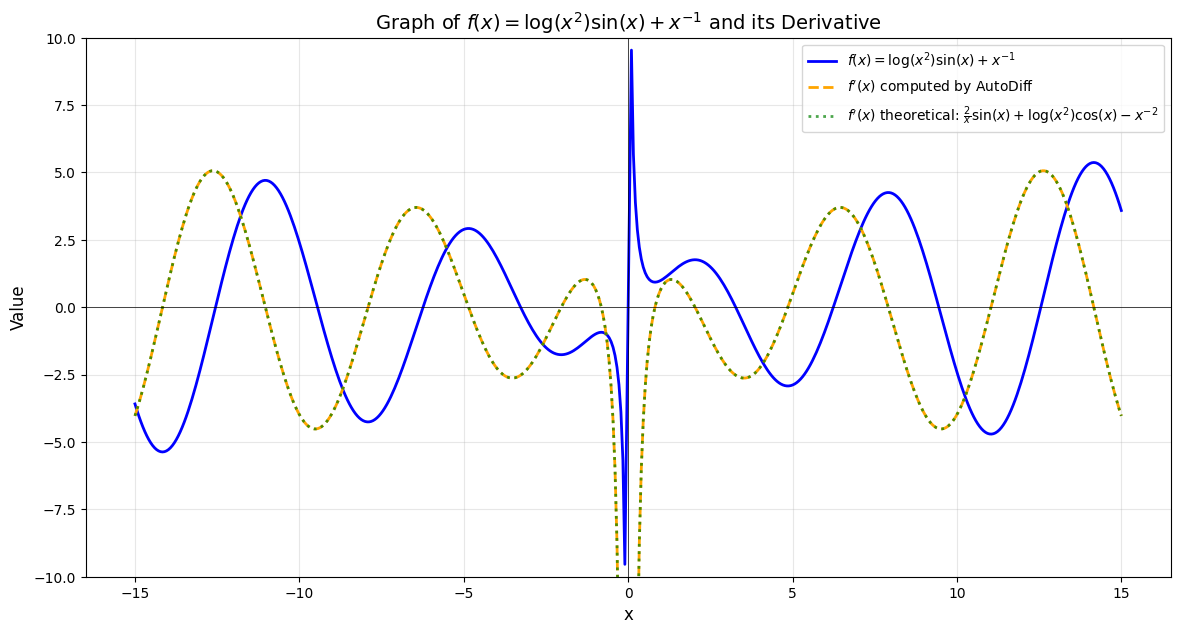

Computation graph:


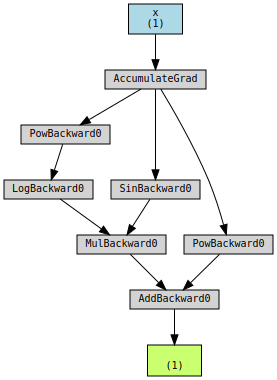

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot

# ============================================================================
# AUTOMATIC DIFFERENTIATION DEMO: Computing derivative of complex function
# f(x) = log(x²)·sin(x) + x⁻¹
# ============================================================================

# 1. Create input data x, avoiding x = 0 (undefined for log and 1/x)
# We split the domain into two parts: negative and positive values
x_left = np.linspace(-15, -0.1, 250)
x_right = np.linspace(0.1, 15, 250)
# Concatenate both sides to create the full domain (excluding x = 0)
x_np = np.concatenate([x_left, x_right])

# Convert numpy array to PyTorch tensor requires_grad=True enables automatic differentiation for this tensor
x = torch.tensor(x_np, dtype=torch.float32, requires_grad=True)

# 2. Define the complex function: f(x) = log(x²)·sin(x) + x⁻¹
y = (torch.log(x**2) * torch.sin(x)) + x**(-1)

# 3. Compute derivatives using Automatic Differentiation
# This computes the derivative at each point independently
y.backward(torch.ones_like(x))

# Print gradient function to see the computation graph structure
print('Gradient function of y:', y.grad_fn)

# 4. Extract data for plotting
# Detach y from computation graph and convert to numpy for visualization
y_vals = y.detach().numpy()

# x.grad contains the computed derivative f'(x)
# The derivative formula (computed by PyTorch automatically):
# f'(x) = d/dx[log(x²)·sin(x) + x⁻¹]
#       = [2/x · sin(x) + log(x²) · cos(x)] - x⁻²
grad_vals = x.grad.numpy()

# Calculate theoretical derivative manually for verification
# d/dx[log(x²)·sin(x)] = (2/x)·sin(x) + log(x²)·cos(x)
# d/dx[x⁻¹] = -x⁻²
theoretical_grad = (2/x_np) * np.sin(x_np) + np.log(x_np**2) * np.cos(x_np) - x_np**(-2)

# 5. Visualize the results
plt.figure(figsize=(14, 7))

# Plot original function
plt.plot(x_np, y_vals,
         label=r'$f(x) = \log(x^2)\sin(x) + x^{-1}$',
         color='blue', linewidth=2)

# Plot derivative computed by AutoDiff
plt.plot(x_np, grad_vals,
         label=r"$f'(x)$ computed by AutoDiff",
         color='orange', linestyle='--', linewidth=2)

# Plot theoretical derivative for comparison
plt.plot(x_np, theoretical_grad,
         label=r"$f'(x)$ theoretical: $\frac{2}{x}\sin(x) + \log(x^2)\cos(x) - x^{-2}$",
         color='green', linestyle=':', linewidth=2, alpha=0.7)

# Customize the plot
plt.title(r"Graph of $f(x) = \log(x^2)\sin(x) + x^{-1}$ and its Derivative", fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5)  # x-axis
plt.axvline(0, color='black', linewidth=0.5)  # y-axis
plt.ylim(-10, 10)  # Limit y-axis for better visualization
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

# 6. Visualize the computation graph
print('=' * 50)
print('Computation graph:')
print('=' * 50)
# Create a simpler example with a single point for clearer graph visualization
x_dummy = torch.tensor([2.0], requires_grad=True)
y_dummy = (torch.log(x_dummy**2) * torch.sin(x_dummy)) + x_dummy**(-1)

# Generate and save the computation graph
make_dot(y_dummy, params={"x": x_dummy})

## ***6.6.*** *Use the chain rule to compute the derivative $df/dx$ of the aforementioned function, placing each term on the dependency graph that you constructed previously.*

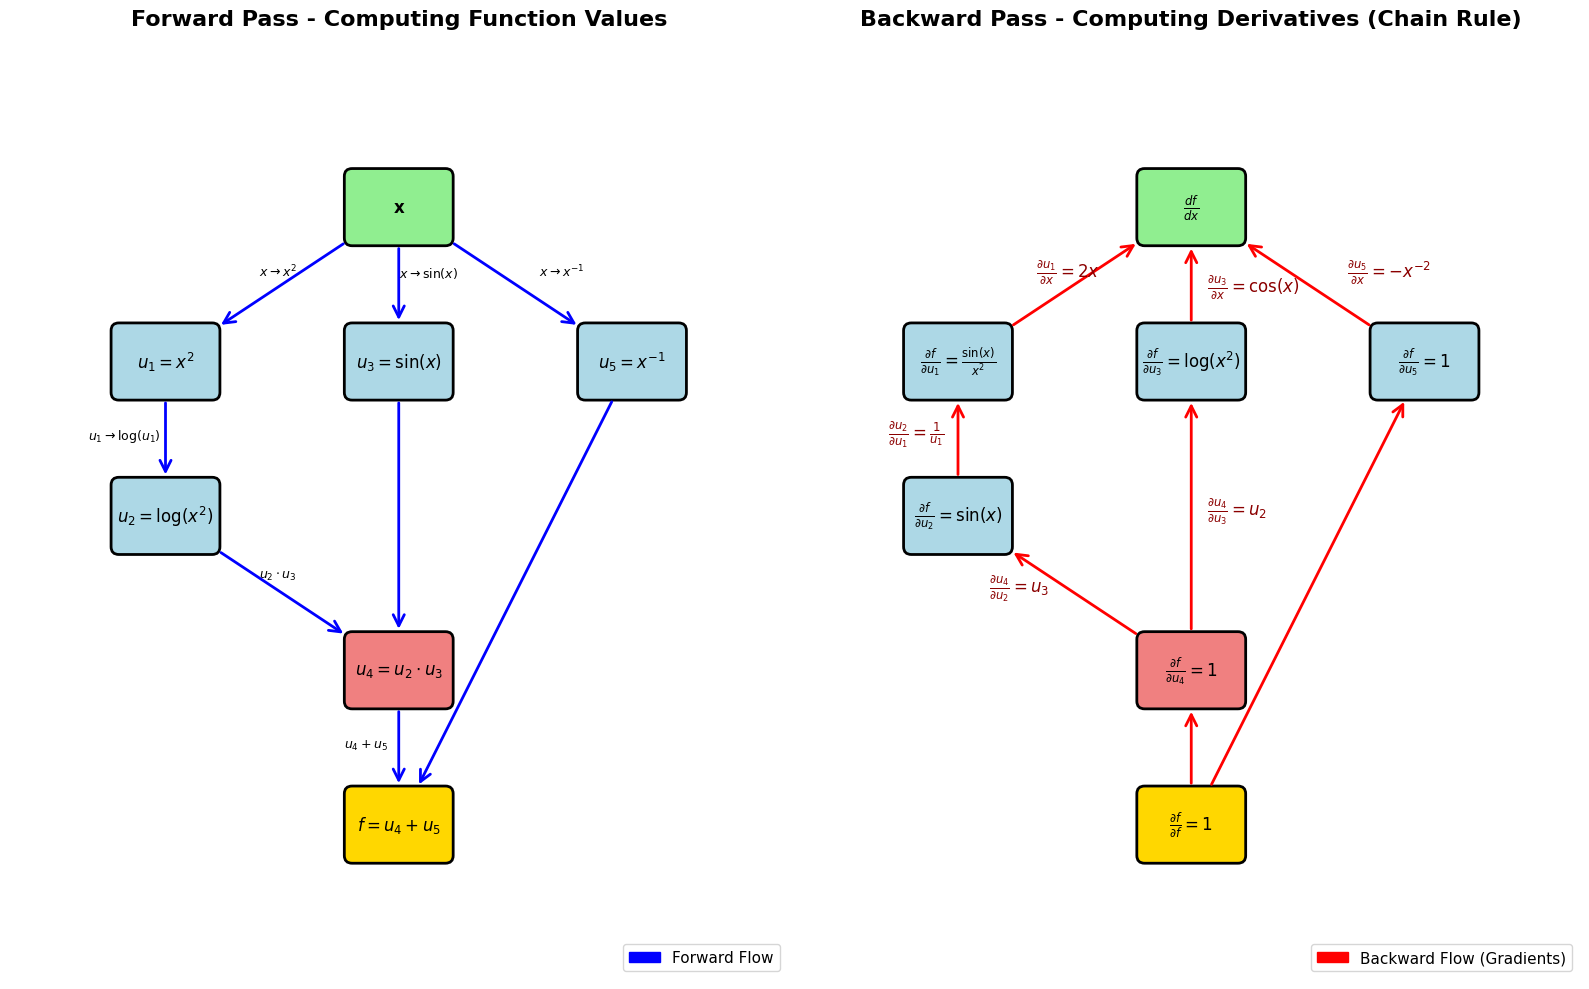

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import numpy as np

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

# ============================================
# FORWARD PASS GRAPH
# ============================================
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 12)
ax1.axis('off')
ax1.set_title('Forward Pass - Computing Function Values', fontsize=16, fontweight='bold', pad=20)

# Define node positions for forward pass
positions_forward = {
  'x': (5, 10),
  'u1': (2, 8),
  'u2': (2, 6),
  'u3': (5, 8),
  'u5': (8, 8),
  'u4': (5, 4),
  'f': (5, 2)
}

# Draw nodes for forward pass
def draw_node(ax, pos, label, color='lightblue'):
  box = FancyBboxPatch((pos[0]-0.6, pos[1]-0.4), 1.2, 0.8,
            boxstyle="round,pad=0.1",
            edgecolor='black', facecolor=color, linewidth=2)
  ax.add_patch(box)
  ax.text(pos[0], pos[1], label, ha='center', va='center',
      fontsize=12, fontweight='bold')

# Draw forward pass nodes
draw_node(ax1, positions_forward['x'], 'x', 'lightgreen')
draw_node(ax1, positions_forward['u1'], r'$u_1 = x^2$', 'lightblue')
draw_node(ax1, positions_forward['u2'], r'$u_2 = \log(x^2)$', 'lightblue')
draw_node(ax1, positions_forward['u3'], r'$u_3 = \sin(x)$', 'lightblue')
draw_node(ax1, positions_forward['u5'], r'$u_5 = x^{-1}$', 'lightblue')
draw_node(ax1, positions_forward['u4'], r'$u_4 = u_2 \cdot u_3$', 'lightcoral')
draw_node(ax1, positions_forward['f'], r'$f = u_4 + u_5$', 'gold')

# Draw arrows for forward pass
def draw_arrow(ax, start, end, label='', color='blue'):
  # Calculate direction vector
  dx = end[0] - start[0]
  dy = end[1] - start[1]
  distance = np.sqrt(dx**2 + dy**2)

  # Normalize direction
  dx_norm = dx / distance
  dy_norm = dy / distance

  # Box dimensions: width=1.2, height=0.8, so half-width=0.6, half-height=0.4
  # Calculate offset based on intersection with box boundary
  # For a rectangular box, we need to check which edge the arrow intersects

  def get_box_offset(dx_n, dy_n):
    # Calculate intersection with box edges
    half_width = 0.6
    half_height = 0.4
    margin = 0.1

    # For near-vertical arrows (dx ≈ 0)
    if abs(dx_n) < 1e-6:
       return half_height + margin

    # For near-horizontal arrows (dy ≈ 0)
    if abs(dy_n) < 1e-6:
      return half_width + margin

    # For diagonal arrows, calculate which edge is hit first
    t_horizontal = half_width / abs(dx_n)
    t_vertical = half_height / abs(dy_n)

    return min(t_horizontal, t_vertical) + margin

  start_offset = get_box_offset(dx_norm, dy_norm)
  end_offset = get_box_offset(-dx_norm, -dy_norm)

  start_adjusted = (start[0] + dx_norm * start_offset, start[1] + dy_norm * start_offset)
  end_adjusted = (end[0] - dx_norm * end_offset, end[1] - dy_norm * end_offset)

  arrow = FancyArrowPatch(start_adjusted, end_adjusted,
             arrowstyle='->', mutation_scale=20,
             linewidth=2, color=color)
  ax.add_patch(arrow)
  if label:
    mid_x, mid_y = (start[0] + end[0])/2, (start[1] + end[1])/2
    ax.text(mid_x + 0.3, mid_y, label, fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Forward arrows
draw_arrow(ax1, positions_forward['x'], positions_forward['u1'], '', 'blue')
draw_arrow(ax1, positions_forward['u1'], positions_forward['u2'], '', 'blue')
draw_arrow(ax1, positions_forward['x'], positions_forward['u3'], '', 'blue')
draw_arrow(ax1, positions_forward['x'], positions_forward['u5'], '', 'blue')
draw_arrow(ax1, positions_forward['u2'], positions_forward['u4'], '', 'blue')
draw_arrow(ax1, positions_forward['u3'], positions_forward['u4'], '', 'blue')
draw_arrow(ax1, positions_forward['u4'], positions_forward['f'], '', 'blue')
draw_arrow(ax1, positions_forward['u5'], positions_forward['f'], '', 'blue')

# Add edge labels for forward pass (positioned near arrows)
ax1.text(3.2, 9.1, r'$x \rightarrow x^2$', fontsize=9, style='italic')
ax1.text(1.0, 7, r'$u_1 \rightarrow \log(u_1)$', fontsize=9, style='italic')
ax1.text(5, 9.1, r'$x \rightarrow \sin(x)$', fontsize=9, style='italic')
ax1.text(6.8, 9.1, r'$x \rightarrow x^{-1}$', fontsize=9, style='italic')
ax1.text(3.2, 5.2, r'$u_2 \cdot u_3$', fontsize=9, style='italic')
ax1.text(4.3, 3, r'$u_4 + u_5$', fontsize=9, style='italic')

# ============================================
# BACKWARD PASS GRAPH
# ============================================
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 12)
ax2.axis('off')
ax2.set_title('Backward Pass - Computing Derivatives (Chain Rule)', fontsize=16, fontweight='bold', pad=20)

# Define node positions for backward pass (same as forward)
positions_backward = positions_forward.copy()

# Draw nodes for backward pass
draw_node(ax2, positions_backward['f'], r'$\frac{\partial f}{\partial f} = 1$', 'gold')
draw_node(ax2, positions_backward['u4'], r'$\frac{\partial f}{\partial u_4} = 1$', 'lightcoral')
draw_node(ax2, positions_backward['u5'], r'$\frac{\partial f}{\partial u_5} = 1$', 'lightblue')
draw_node(ax2, positions_backward['u2'], r'$\frac{\partial f}{\partial u_2} = \sin(x)$', 'lightblue')
draw_node(ax2, positions_backward['u3'], r'$\frac{\partial f}{\partial u_3} = \log(x^2)$', 'lightblue')
draw_node(ax2, positions_backward['u1'], r'$\frac{\partial f}{\partial u_1} = \frac{\sin(x)}{x^2}$', 'lightblue')
draw_node(ax2, positions_backward['x'], r'$\frac{df}{dx}$', 'lightgreen')

# Draw arrows for backward pass (reversed direction)
draw_arrow(ax2, positions_backward['f'], positions_backward['u4'], '', 'red')
draw_arrow(ax2, positions_backward['f'], positions_backward['u5'], '', 'red')
draw_arrow(ax2, positions_backward['u4'], positions_backward['u2'], '', 'red')
draw_arrow(ax2, positions_backward['u4'], positions_backward['u3'], '', 'red')
draw_arrow(ax2, positions_backward['u2'], positions_backward['u1'], '', 'red')
draw_arrow(ax2, positions_backward['u1'], positions_backward['x'], '', 'red')
draw_arrow(ax2, positions_backward['u3'], positions_backward['x'], '', 'red')
draw_arrow(ax2, positions_backward['u5'], positions_backward['x'], '', 'red')

# Add gradient flow labels (positioned near arrows)
ax2.text(2.4, 5, r'$\frac{\partial u_4}{\partial u_2} = u_3$', fontsize=12, style='italic', color='darkred')
ax2.text(5.2, 6, r'$\frac{\partial u_4}{\partial u_3} = u_2$', fontsize=12, style='italic', color='darkred')
ax2.text(1.1, 7, r'$\frac{\partial u_2}{\partial u_1} = \frac{1}{u_1}$', fontsize=12, style='italic', color='darkred')
ax2.text(3, 9.1, r'$\frac{\partial u_1}{\partial x} = 2x$', fontsize=12, style='italic', color='darkred')
ax2.text(5.2, 8.9, r'$\frac{\partial u_3}{\partial x} = \cos(x)$', fontsize=12, style='italic', color='darkred')
ax2.text(7, 9.1, r'$\frac{\partial u_5}{\partial x} = -x^{-2}$', fontsize=12, style='italic', color='darkred')

# Add final result box
# result_text = r'$\frac{df}{dx} = \frac{2\sin(x)}{x} + \log(x^2)\cos(x) - x^{-2}$'
# ax2.text(5, 0.5, result_text, fontsize=14, fontweight='bold',
#     ha='center', va='center',
#     bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow', alpha=0.8, edgecolor='black', linewidth=2))

# Add legend
forward_patch = mpatches.Patch(color='blue', label='Forward Flow')
backward_patch = mpatches.Patch(color='red', label='Backward Flow (Gradients)')
ax1.legend(handles=[forward_patch], loc='lower right', fontsize=11)
ax2.legend(handles=[backward_patch], loc='lower right', fontsize=11)

plt.tight_layout()

plt.show()

## ***6.7.*** *Given the graph and the intermediate derivative results, you have a number of options when computing the gradient. Evaluate the result once starting from $x$ to $f$ and once from $f$ tracing back to $x$. The path from $x$ to $f$ is commonly known as forward differentiation, whereas the path from $f$ to $x$ is known as backward differentiation.*

### ***6.7.1.*** *Manual Compuatation*

#### **Step 1.** Same function as 5.4:

$$f(x) = \log(x^2)\,\sin x + x^{-1}$$

Define the intermediate variables:

- $v_1 = x^2$
- $v_2 = \log(v_1)$
- $v_3 = \sin(x)$
- $v_4 = v_2 \cdot v_3$
- $v_5 = x^{-1}$
- $f = v_4 + v_5$



#### **Step 2.** Forward Differentiation (x → f)

$$
v_1' = \frac{dv_1}{dx} = \frac{d(x^2)}{dx} = 2x
$$


$$
v_2' = \frac{dv_2}{dx}
     = \frac{dv_2}{dv_1} \cdot \frac{dv_1}{dx}
     = \frac{d(\log(v_1))}{dv_1} \cdot v_1'
     = \frac{1}{v_1} \cdot 2x
     = \frac{2}{x}
$$


$$
v_3' = \frac{dv_3}{dx}
     = \frac{d(\sin x)}{dx}
     = \cos x
$$


$$
v_4' = (v_2 v_3)'
     = v_2' v_3 + v_2 v_3'
     = \frac{2}{x} \sin x + \log(x^2)\cos x
$$


$$
v_5' = \frac{dv_5}{dx}
     = \frac{d(x^{-1})}{dx}
     = -\frac{1}{x^2}
$$


#### **Step 3.** Derivative of \(f\):

$$
f'(x) = v_4' + v_5'
$$

$$
f'(x) = \frac{2}{x}\sin x + \log(x^2)\cos x - \frac{1}{x^2}
$$


#### **Step 4.** Backward Differentiation (f → x)

Start with:

$$\bar{f} = 1$$

#### **Step 5.** From $f$ to $(v_4, v_5)$

$$\bar{v}_4
= \bar{f} \cdot \frac{\partial f}{\partial v_4}
= 1 \cdot \frac{\partial (v_4 + v_5)}{\partial v_4}
= 1 \cdot \left( \frac{\partial v_4}{\partial v_4} + \frac{\partial v_5}{\partial v_4} \right)
=1 \cdot (1 + 0) = 1$$

$$\bar{v}_5
= \bar{f} \cdot \frac{\partial f}{\partial v_5}
= 1 \cdot \frac{\partial (v_4 + v_5)}{\partial v_5}
= 1 \cdot \left( \frac{\partial v_4}{{\partial v_5}} + \frac{\partial v_5}{\partial v_5} \right)
= 1 \cdot (0 + 1) = 1$$

#### **Step 6.** From $v_4$ to $(v_2, v_3)$

$$v_4 = v_2.v_3$$

$$\bar{v}_2
= \bar{v}_4 \cdot \frac{\partial v_4}{\partial v_2}
= 1 \cdot \frac{\partial (v_2 \cdot v_3)}{\partial v_2}
= 1 \cdot \left( \frac{\partial v_2}{\partial v_2} \cdot v_3 + v_2 \cdot \frac{\partial v_3}{\partial v_2} \right)
= 1 \cdot (1 \cdot v_3 + v_2 \cdot 0) = v_3$$

$$\bar{v}_3
= \bar{v}_4 \cdot \frac{\partial v_4}{\partial v_3}
= 1 \cdot \frac{\partial (v_2 \cdot v_3)}{\partial v_3}
= 1 \cdot \left( v_2 \cdot \frac{\partial v_3}{\partial v_3} + v_3 \cdot \frac{\partial v_2}{\partial v_3} \right)
= 1 \cdot (v_2 \cdot 1 + v_3 \cdot 0) = v_2$$

#### **Step 7.** From $v_2$ to $v_1$

$$v_2 = \log(v_1)$$

$$\bar{v}_1 = \bar{v}_2 \cdot \frac{\partial v_2}{\partial v_1}
            =v_3 \cdot \frac{\partial (\log v_1)}{\partial v_1}
            = v_3 \cdot \frac{1}{v_1}
            = \frac{v_3}{v_1}$$

#### **Step 8.** From $v_5$ to $x$

$$v_5 = x^{-1}$$

$$\bar{x}_{v_5} = \bar{v}_5 \cdot \frac{\partial v_5}{\partial x}
               = 1 \cdot \left(-\frac{1}{x^2}\right)
               = -\frac{1}{x^2}$$

#### **Step 9.** From $v_3$ to $x$

$$v_3 = \sin x$$

$$\bar{x}_{v_3} = \bar{v}_3 \cdot \frac{\partial v_3}{\partial x}
               = v_2 \cdot \cos x
               = \log(x^2)\cos x$$

#### **Step 10.** From $v_1$ to $x$

$$v_1 = x^2$$

$$\bar{x}_{v_1} = \bar{v}_1 \cdot \frac{\partial v_1}{\partial x}
               = \frac{v_3}{v_1} \cdot 2x
               = \frac{2}{x}\sin x$$

#### **Step 10.** Final Gradient

$$
\bar{x} = \bar{x}_{v_1} + \bar{x}_{v_3} + \bar{x}_{v_5}
        = \frac{2}{x}\sin x + \log(x^2)\cos x - \frac{1}{x^2}
$$

So forward and backward differentiation give the same result:

$$
\frac{df}{dx}
= \frac{2}{x}\sin x + \log(x^2)\cos x - \frac{1}{x^2}.
$$


### ***6.7.2.*** *Code Implementation*

In [ ]:
import torch

# ============================================================================
# AUTOMATIC DIFFERENTIATION DEMO: Backward and Forward Comparision
# f(x) = log(x²)·sin(x) + x⁻¹
# ============================================================================
def f(x: torch.Tensor) -> torch.Tensor:
    return torch.log(x**2) * torch.sin(x) + 1/x

# -----------------------------
# Backward differentiation (backward-mode)
# -----------------------------
def grad_backward(x_val: float) -> float:
    x = torch.tensor(x_val, requires_grad=True)
    y = f(x)
    y.backward()      # backward pass
    return x.grad.item()
# -----------------------------
# Forward differentiation (forward-mode)
# -----------------------------
from torch.func import jvp

def grad_forward(x_val: float) -> float:
    x = torch.tensor(x_val)
    tangent = torch.ones_like(x)
    y, jvp_val = jvp(f, (x,), (tangent,))
    return jvp_val.item()

# -----------------------------
# Compare Forward vs Backward autodiff
# -----------------------------
test_x = [0.5, 1.0, 2.0, 3.0]

for x_val in test_x:
    g_back = grad_backward(x_val)
    g_forw = grad_forward(x_val)
    print(f"x = {x_val:.2f}")
    print("  Backward (f → x) df/dx =", g_back)
    print("  Forward  (x → f) df/dx =", g_forw)
    print("  |diff|               =", abs(g_back - g_forw))
    print("-" * 40)


x = 0.50
  Backward (f → x) df/dx = -3.2988858222961426
  Forward  (x → f) df/dx = -3.2988855838775635
  |diff|               = 2.384185791015625e-07
----------------------------------------
x = 1.00
  Backward (f → x) df/dx = 0.6829419136047363
  Forward  (x → f) df/dx = 0.6829419136047363
  |diff|               = 0.0
----------------------------------------
x = 2.00
  Backward (f → x) df/dx = 0.08239537477493286
  Forward  (x → f) df/dx = 0.08239537477493286
  |diff|               = 0.0
----------------------------------------
x = 3.00
  Backward (f → x) df/dx = -2.1922671794891357
  Forward  (x → f) df/dx = -2.1922671794891357
  |diff|               = 0.0
----------------------------------------


## ***6.8.*** *When might you want to use forward, and when backward, differentiation?*

**- Forward vs. Backward Differentiation**

From a mathematical point of view, forward-mode and reverse-mode automatic differentiation
are mirror images of each other. However, from a computational point of view, they behave
very differently because computer programs naturally execute *forward* from inputs to outputs.

Consider a function:

$$
f : \mathbb{R}^n \rightarrow \mathbb{R}^m
$$

Here:
\(n\) denotes the dimensional input
\(m\) denotes the dimensional output.  
The first key distinction between forward-mode and reverse-mode is how the computational
cost scales with the number of input and output dimensions.


**- Cost Scaling**

- **Forward-mode differentiation** (inputs to outputs) has cost proportional to:

$$
n = \text{number of inputs}
$$

which is ideal when \( n \<< m \).

- **Reverse-mode differentiation** (outputs to inputs) has cost proportional to:

$$
m = \text{number of outputs}
$$

which is ideal when \( m \<< n \).



**- Reverse Mode in Large-scale Optimization**

The case \( m \<< n \) is extremely common in machine learning and engineering optimization:

-  n     : many parameters  
-  m = 1 : a single loss value  

Hence, **reverse-mode differentiation (backpropagation)** is the dominant method for training
neural networks.



**- Practical Considerations**

*a. Forward Mode*
- Proceeds in the same direction as normal computation (inputs → outputs).
- Simple to implement.
- Requires no special memory or tape.

*b. Reverse Mode*
- Proceeds in the opposite direction of normal computation.
- More complex to implement.
- Requires storing a **tape** of intermediate values.
- After computing outputs, the tape is replayed backward to propagate gradients.

Because of these reasons, forward mode can be more efficient for moderate input sizes
(e.g., until \( n > 100 \), depending on the function and AD implementation).


# **7. Conclusion**

***Automatic Differentiation (AD)*** provides a powerful and efficient way to compute derivatives of complex functions by systematically applying the chain rule over a computational graph. Unlike symbolic or numerical differentiation, AD avoids expression explosion, eliminates redundant computation, and delivers gradients with machine-level precision. These properties make AD the backbone of modern deep learning, enabling backpropagation to scale to models with millions or billions of parameters. Understanding AD not only clarifies how gradients flow through networks but also highlights why today’s neural architectures can be trained effectively and reliably.

# **8. References**

- Dive into Deep Learning - Chapter 2.5: Automatic Differentiation
- Dive into Deep Learning - Chapter 22.4: Multivariable Calculus
- MIT 18.S096 - Lecture 8: Automatic Differentiation
- Pytorch Libraries: https://pytorch.org/